## Graph Function:

* Objectives Implemented:
1. Plotting a histogram and boxplot for each numerical variable
2. Plotting a Bar graph for all the Categorical Variable 

### Improvisations:

#### LINE Plot
* Plotting Line graph for the desired column with the target variable. 
* While Plotting Line graph user can give input on which column he/she wants the line graph with target variable.
* User can plot line graph for time depenedent variable
* This function will give line graph along all the aggreagte functions(min,max,median,mean) for target variables

#### Pair Plot, Heat Map, Scatter plot

* These plots will give the raltionship between all the numerical variables which includes pair plot, scatter plot, and heatmap

#### Steps Followed:
* User is giving input of file name, column name and Directory path are set to default 
* Importing libraries
* Reading the dataset
* Bifercating the dataset into categorical and numerical variables (Note: Converting numerical into categorical variable which   is having only 2 values in the column )
* Plotting boxplots and histogram for numerical variables
* Plotting bar plots for categorical variables
* Plotting line graph, scatter plot, pair plot, heatmap for all the numerical variables

In [31]:
# graph function for categorical and numerical variables


def graph(data,target,time,columns = [],path ='C://Users//shubh//Desktop//Python'):
    
    #importing libraries 
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from pandas.plotting import scatter_matrix
    import seaborn as sns
    
    #reading the data into dataframe
    data = path+'//'+data
    data = pd.read_csv(data)
    
    #Defining the default values for columns argument
    if len(columns) == 0:
        columns = list(data.columns)
    
    for i in data.columns:
        if data[i].dtypes != 'object' :   #numerical variables
            #print(columns(i).dtype)
            
            #Histograms of numerical variables
            data.hist(column = i,grid=False, color="orange", edgecolor="black", bins=10)
            plt.title("Histogram of " +i) 
            #plt.savefig('hist_'+i+'.png')
            plt.show()
            
            #Boxplots of numerical variables
            data.boxplot(column = i, notch=True, vert=False)
            plt.xlabel("Boxplot of " +i)
            #plt.savefig('Boxplt_'+i+'.png')
            plt.show()
            
            #scatter plots for all variables
            data.plot(kind ='scatter', x = i, y = target, color = 'black', figsize = (8,8), fontsize = 12)
            plt.savefig('Scatter_'+i+'with_'+target+'.png')
            

        elif data[i].dtypes == 'object' or (data[i].dtypes != 'object' and data[i].nunique() <= 2):  #categorical variables
            
            #bar graphs for categorical variables
            ax = plt.subplot()
            plt.bar(data[i], height = 200)
            plt.xlabel("Bar Graph of "+i)
            ax.autoscale(enable = True)
            #plt.savefig('barchart_'+i+'.png')
            plt.show()

            
        # list of aggregate functions
        type=[np.sum,np.mean,np.max,np.min]
    
        if i == time:
            for j in type:                   # selecting an aggregate function in each iteration
                print(j)
                a = data[[time,target]].groupby([time]).agg(j)  # converting into dataframe
                a.to_csv("a.csv")                               # importing to csv
                b = pd.read_csv('a.csv')                        # reading the data into dataframe
                x = b[[time]]                                   # x is assigned with time variab
                y = b[[target]]                                 # y is the target variable being used
                plt.plot(x,y)
                plt.title(i+'vs '+str(j)+' ('+target+')')
                plt.show()     
    
    
    
    # Defining k (k is a list of numerical variables)
    k=list(data.select_dtypes(exclude=[np.object]))     # listing numerical values in k
    
    # HEAT MAP for correlation matrix
    
    sns.heatmap(data[k].corr(),annot=True)
        
    # PAIR PLOT
    i=[target,k]
    sns.pairplot(data[k],size=2) 
    
    

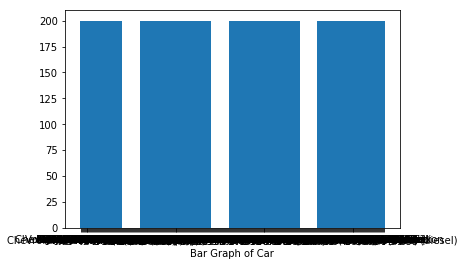

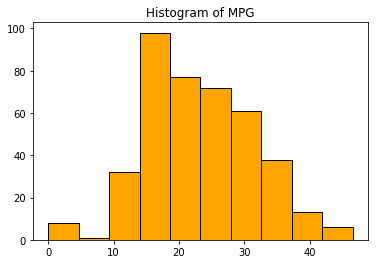

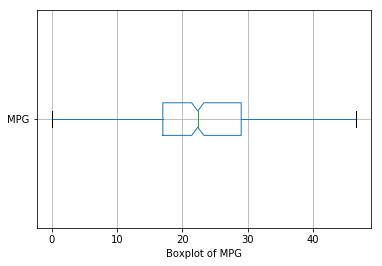

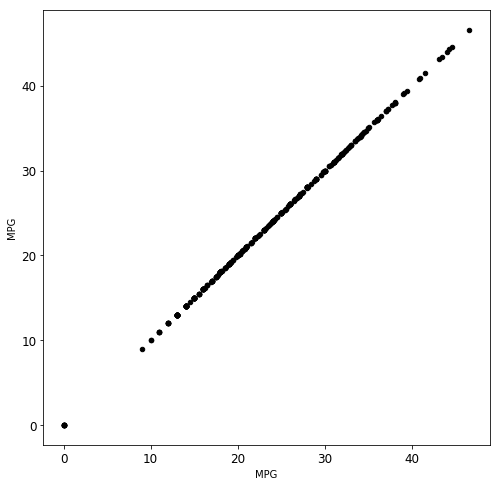

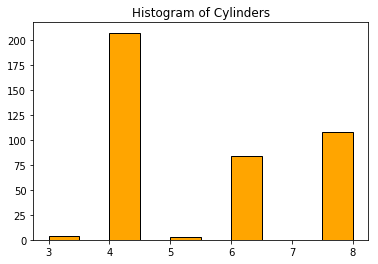

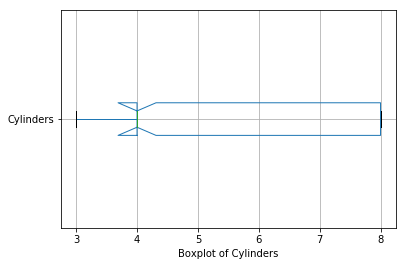

<function sum at 0x00000243CD5FDD08>


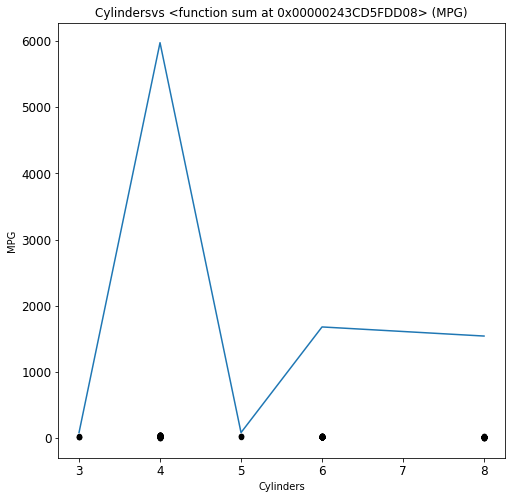

<function mean at 0x00000243CD60AB70>


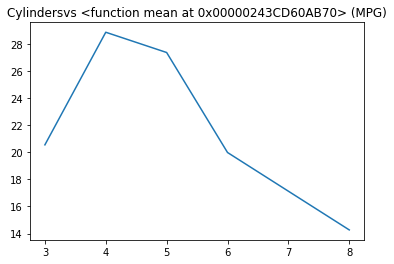

<function amax at 0x00000243CD60A2F0>


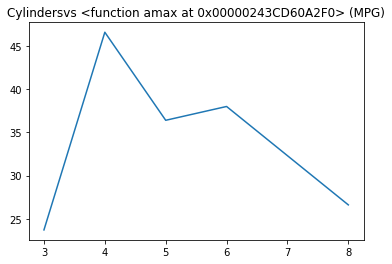

<function amin at 0x00000243CD60A400>


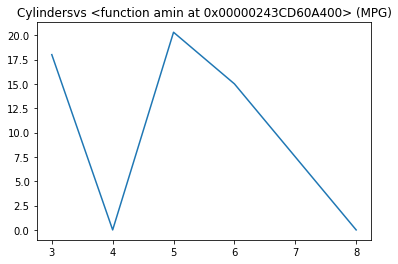

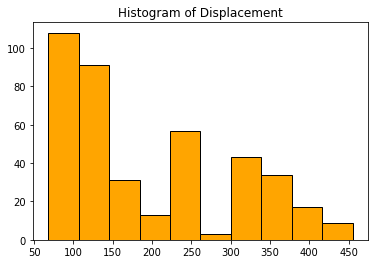

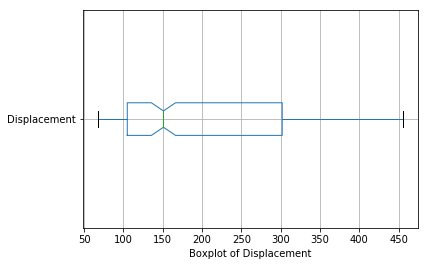

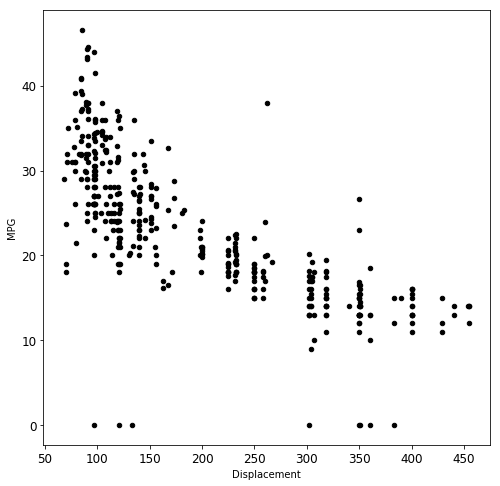

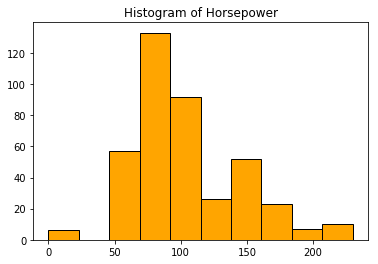

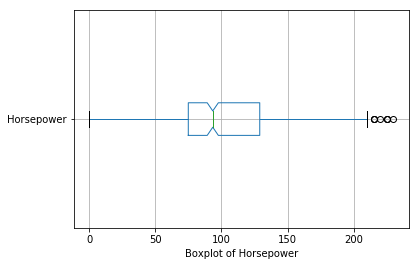

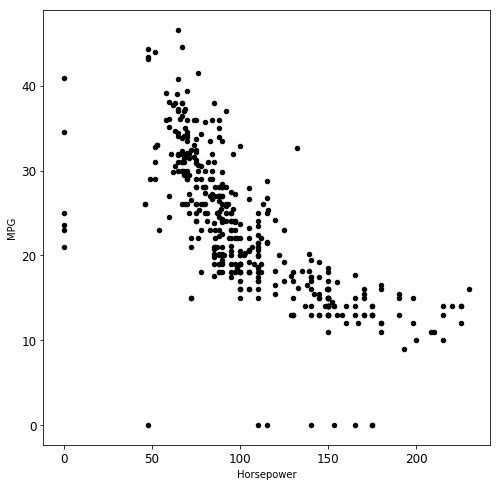

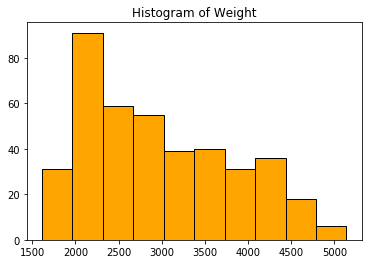

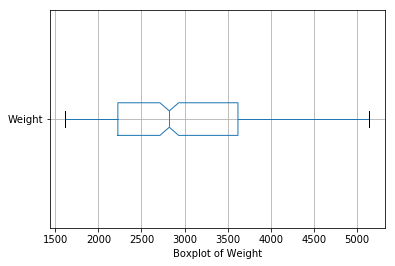

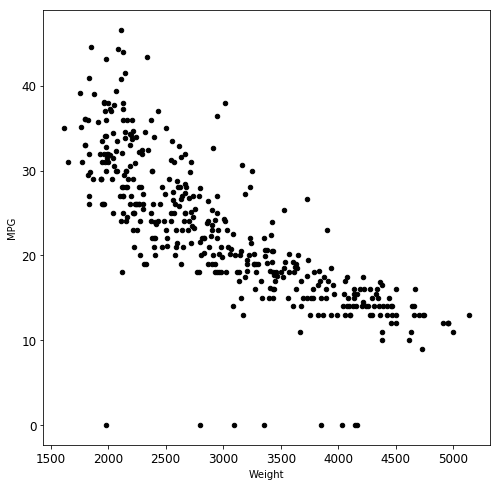

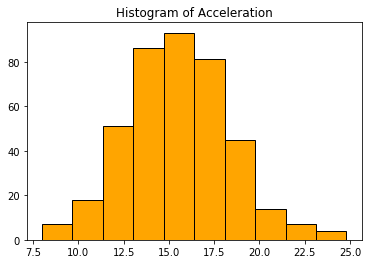

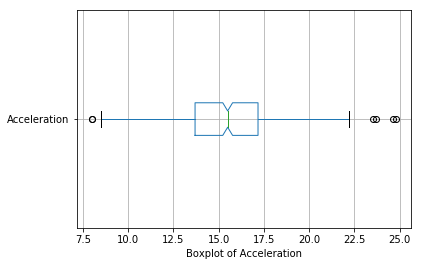

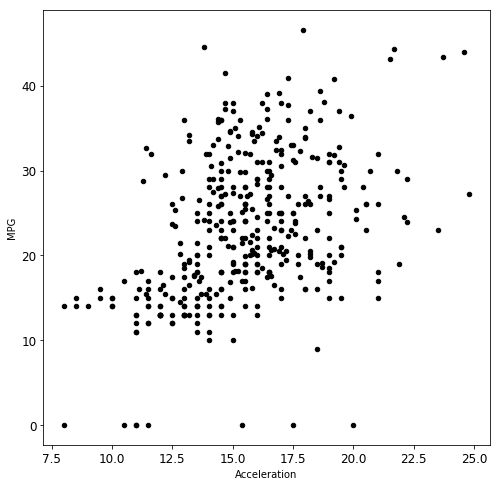

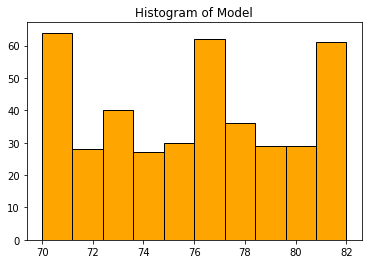

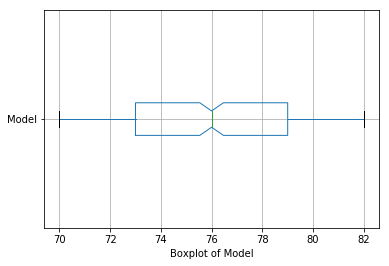

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


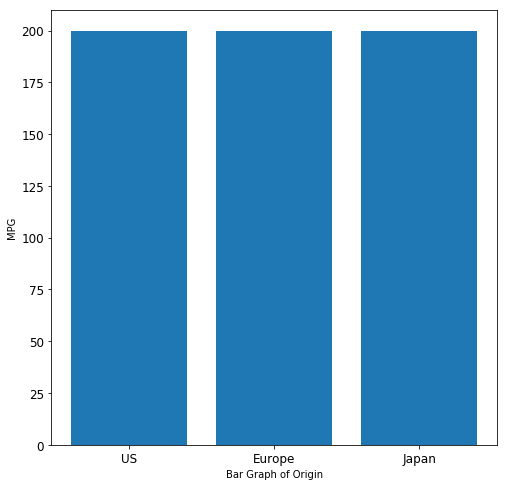

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


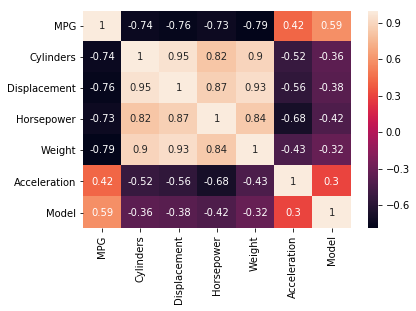

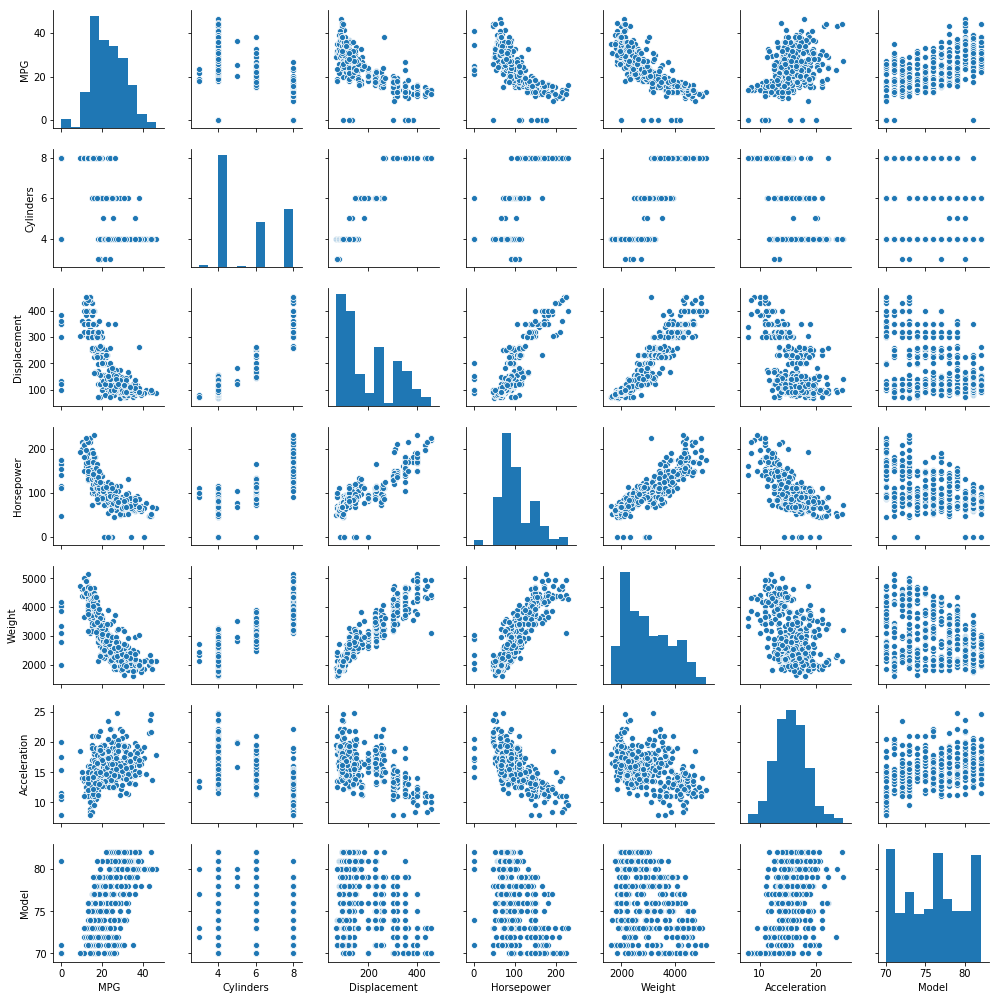

In [30]:
# Calling the function

graph('cars.csv','MPG','Cylinders','E:\\Graph function')